# PART 1 : data exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
heart_attack = pd.read_csv("https://raw.githubusercontent.com/skhebbeb/AAA/main/heart_attack_prediction_dataset.csv")
target_name = "Heart Attack Risk"
data = heart_attack.drop(columns=target_name)
target = heart_attack[target_name]

data[['Systole', 'Diastole']] = data['Blood Pressure'].str.split('/', expand=True)
data.drop('Blood Pressure', axis=1, inplace = True)

In [ ]:
numerical_features = [
    "Age","Cholesterol", "Systole", "Diastole", "Heart Rate", "Diabetes", "Family History",
    "Smoking",	"Obesity",	"Alcohol Consumption",	"Exercise Hours Per Week",
    "Previous Heart Problems",	"Medication Use",	"Stress Level",
    "Sedentary Hours Per Day", "Income",	"BMI",	"Triglycerides",
    "Physical Activity Days Per Week", "Sleep Hours Per Day"
]

data_numerical = data[numerical_features]

In [ ]:
non_numerical_features=["Sex","Diet","Country","Continent","Hemisphere"]
data_non_numerical = data[non_numerical_features]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Mise à l'échelle des données numériques

scaler = StandardScaler()
data_numerical_scaled = pd.DataFrame()
for colonne in numerical_features:
    data_numerical_scaled[colonne] = scaler.fit_transform(data_numerical[colonne].values.reshape(-1, 1)).flatten()


# Encodage des données non numériques

label_encoder = LabelEncoder()
data_non_numerical_encoded = pd.DataFrame()
for colonne in non_numerical_features:
    data_non_numerical_encoded[colonne] = label_encoder.fit_transform(data_non_numerical[colonne])


# Concaténer les deux DataFrames en une seule dataset

df_scale = pd.concat([data_non_numerical_encoded,  data_numerical_scaled], axis=1)
#print(df_scale)

# Correlation Heatmap


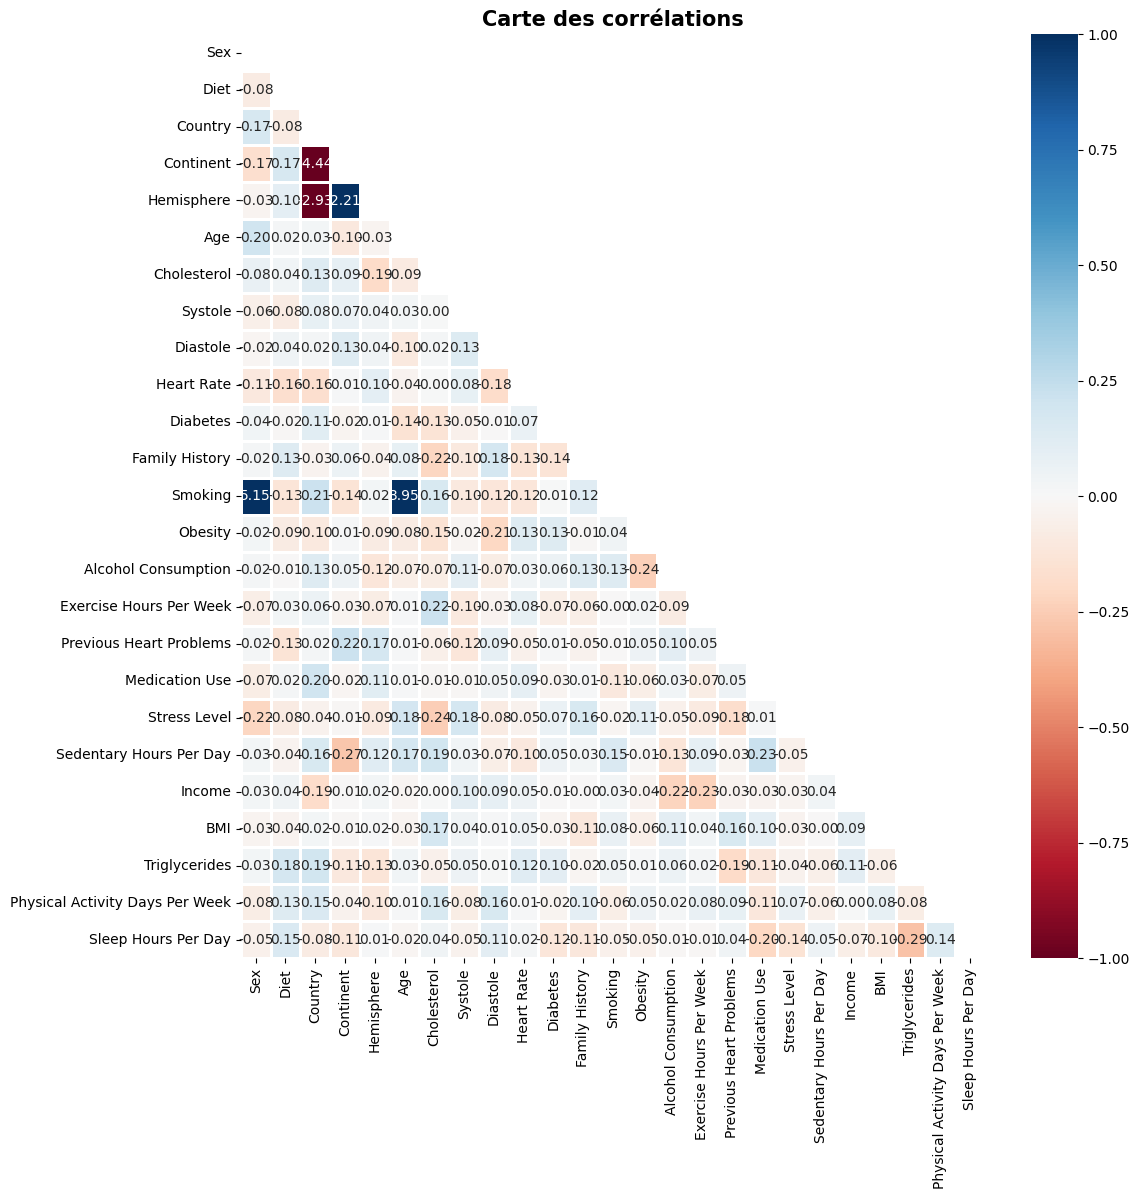

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

covmat = df_scale.corr()



plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(covmat, dtype=bool))
sns.heatmap(10*covmat, mask=mask, center=0, cmap='RdBu',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

We saw that the Country, Hemisphere and Continent columns are very correlated. That's why we decide to erase the Hemisphere and Country columns from the dataset.

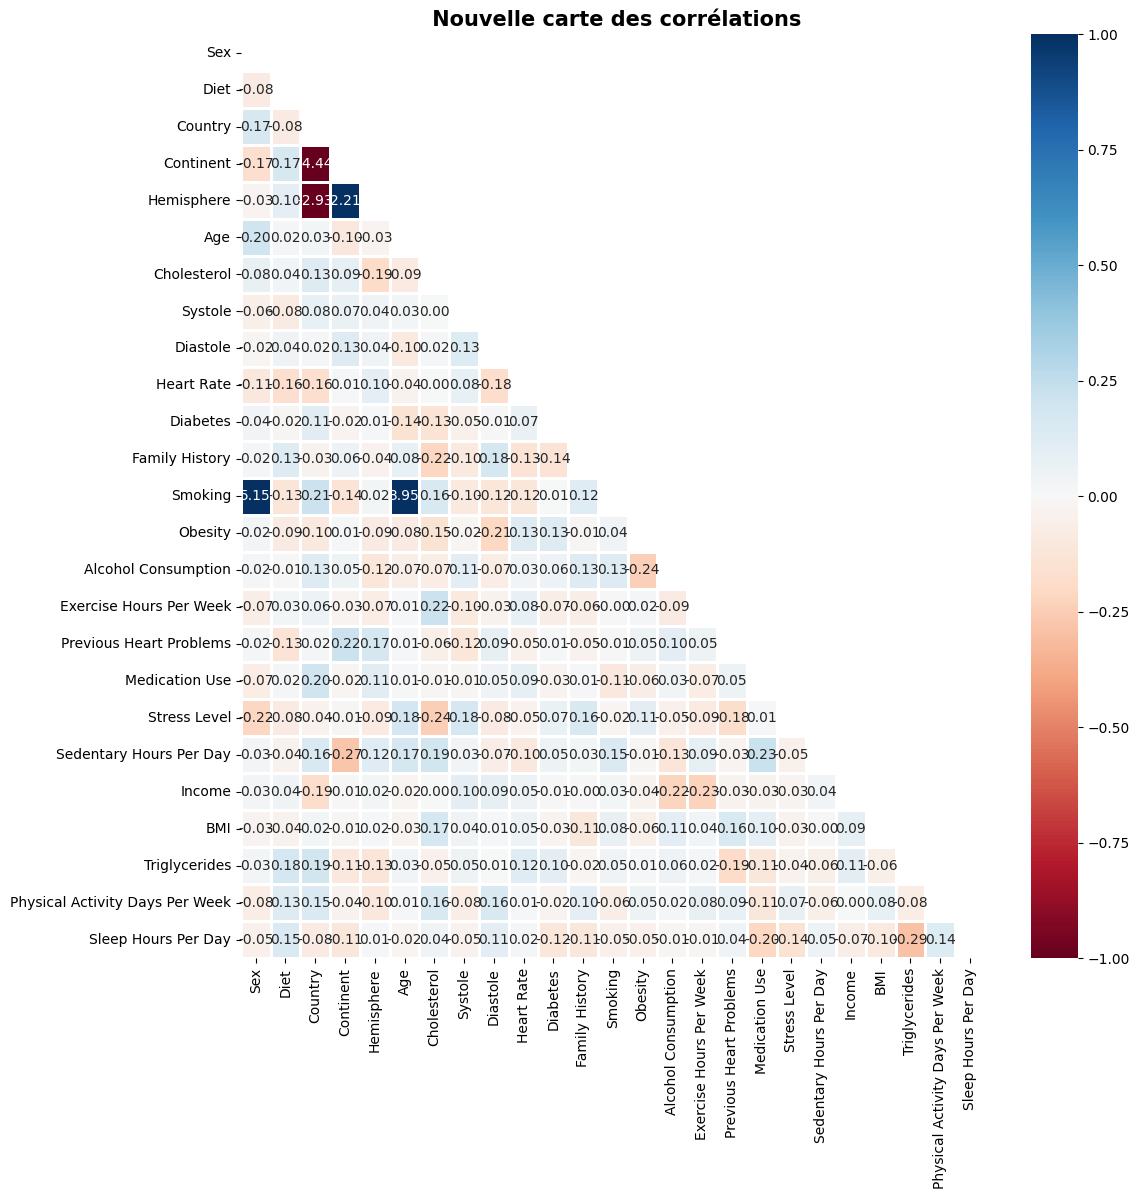

In [ ]:
#df_scale.drop('Hemisphere', axis=1, inplace=True)
#df_scale.drop('Country', axis=1, inplace=True)
covmat = df_scale.corr()



plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(covmat, dtype=bool))
sns.heatmap(10*covmat, mask=mask, center=0, cmap='RdBu',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title(' Nouvelle carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

We have multiplicated all the values by 100 because the values were initially tiny.
We can see that the features Smoking and Age are the only ones correlated.

Now the data is clean, and has no missing values.

In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Systole,Diastole
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,91,88


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

# Gender Feature

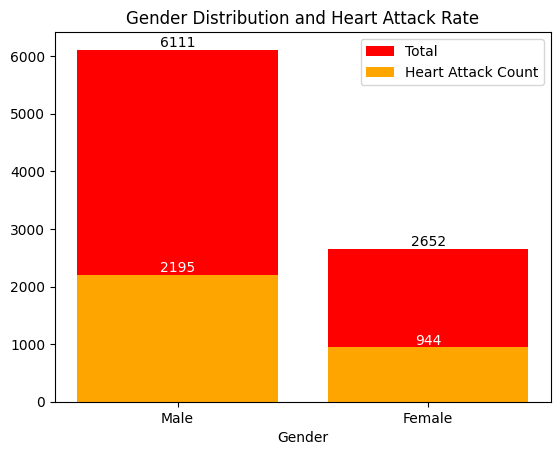

In [ ]:
male_data = data[data['Sex'] == 'Male']
female_data = data[data['Sex'] == 'Female']

male_heart_attack_rate = target[male_data.index].mean()
female_heart_attack_rate = target[female_data.index].mean()

fig, ax = plt.subplots()
bars1 = ax.bar(['Male', 'Female'], [male_data.shape[0], female_data.shape[0]], color='red', label='Total')
bars2 = ax.bar(['Male', 'Female'], [male_heart_attack_rate * male_data.shape[0], female_heart_attack_rate * female_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Gender Distribution and Heart Attack Rate')
plt.xlabel('Gender')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval)}', ha='center', va='bottom', color='white')


plt.show()

The proportion of people with heart attack risk is almost the same among male and among female : around 36% for both.

# Age feature

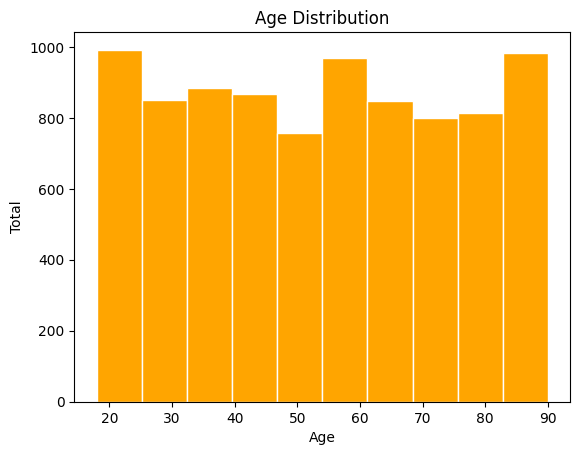

In [ ]:
plt.hist(data['Age'], color = 'orange', edgecolor = 'white')
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Age Distribution')
plt.show()


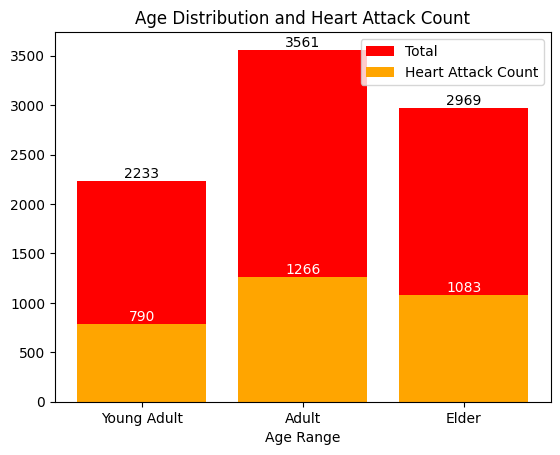

In [ ]:
data['Age_Range'] = pd.cut(data['Age'], bins=[0, 35, 65, 100], labels=['Young Adult', 'Adult', 'Elder'])

young_adult_data = data[data['Age_Range'] == 'Young Adult']
adult_data = data[data['Age_Range'] == 'Adult']
elder_data = data[data['Age_Range'] == 'Elder']

young_adult_heart_attack_rate = target[young_adult_data.index].mean()
adult_heart_attack_rate = target[adult_data.index].mean()
elder_heart_attack_rate = target[elder_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Young Adult', 'Adult', 'Elder'], [young_adult_data.shape[0], adult_data.shape[0], elder_data.shape[0]], color='red', label='Total')

bars2 = ax.bar(['Young Adult', 'Adult', 'Elder'], [young_adult_heart_attack_rate * young_adult_data.shape[0], adult_heart_attack_rate * adult_data.shape[0], elder_heart_attack_rate * elder_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Age Distribution and Heart Attack Count')
plt.xlabel('Age Range')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

There is a majority of adults (35-65), followed by elders (65+) and young adults (18-35). The proportion of people with heart attack risk is almost the same among the different age ranges : 36% for young adults, 35% for adults and around 36% for elders.

# Smoking Feature

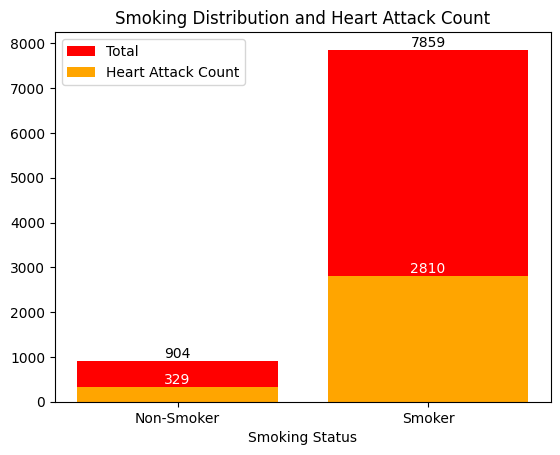

In [ ]:
non_smoker_data = data[data['Smoking'] == 0]
smoker_data = data[data['Smoking'] == 1]

non_smoker_heart_attack_rate = target[non_smoker_data.index].mean()
smoker_heart_attack_rate = target[smoker_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Non-Smoker', 'Smoker'], [non_smoker_data.shape[0], smoker_data.shape[0]], color='red', label='Total')

bars2 = ax.bar(['Non-Smoker', 'Smoker'], [non_smoker_heart_attack_rate * non_smoker_data.shape[0], smoker_heart_attack_rate * smoker_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Smoking Distribution and Heart Attack Count')
plt.xlabel('Smoking Status')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

# Family History Feature

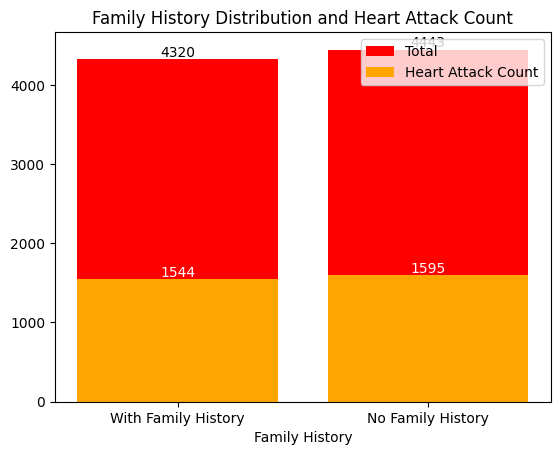

In [ ]:
family_history_data = data[data['Family History'] == 1]
no_family_history_data = data[data['Family History'] == 0]

family_history_heart_attack_rate = target[family_history_data.index].mean()
no_family_history_heart_attack_rate = target[no_family_history_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['With Family History', 'No Family History'], [family_history_data.shape[0], no_family_history_data.shape[0]], color='red', label='Total')

bars2 = ax.bar(['With Family History', 'No Family History'], [family_history_heart_attack_rate * family_history_data.shape[0], no_family_history_heart_attack_rate * no_family_history_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Family History Distribution and Heart Attack Count')
plt.xlabel('Family History')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

# Physical Activity Days Per Week Feature

In [ ]:
print(data['Physical Activity Days Per Week'].max())

7


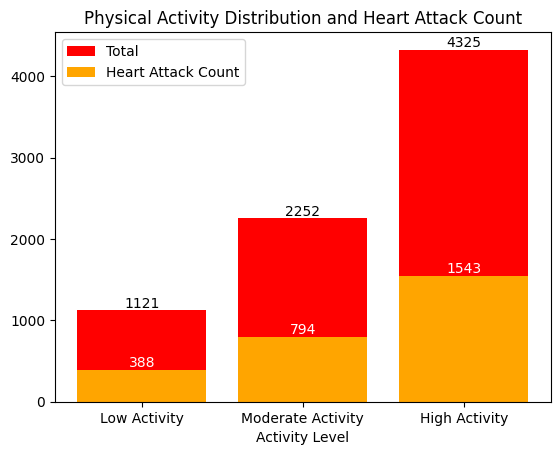

In [ ]:
data['Activity_Range'] = pd.cut(data['Physical Activity Days Per Week'], bins=[0, 1, 3, 7], labels=['Low', 'Moderate', 'High'])

low_activity_data = data[data['Activity_Range'] == 'Low']
moderate_activity_data = data[data['Activity_Range'] == 'Moderate']
high_activity_data = data[data['Activity_Range'] == 'High']

low_activity_heart_attack_rate = target[low_activity_data.index].mean()
moderate_activity_heart_attack_rate = target[moderate_activity_data.index].mean()
high_activity_heart_attack_rate = target[high_activity_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Low Activity', 'Moderate Activity', 'High Activity'], [low_activity_data.shape[0], moderate_activity_data.shape[0], high_activity_data.shape[0]], color='red', label='Total')

bars2 = ax.bar(['Low Activity', 'Moderate Activity', 'High Activity'], [low_activity_heart_attack_rate * low_activity_data.shape[0], moderate_activity_heart_attack_rate * moderate_activity_data.shape[0], high_activity_heart_attack_rate * high_activity_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Physical Activity Distribution and Heart Attack Count')
plt.xlabel('Activity Level')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

# Sleep Feature

In [ ]:
print(data['Sleep Hours Per Day'].max())

10


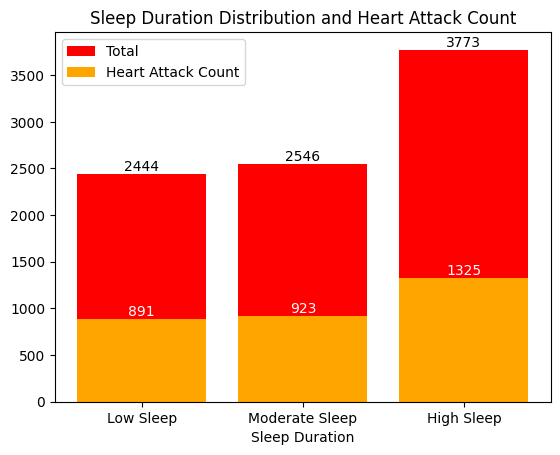

In [ ]:
data['Sleep_Range'] = pd.cut(data['Sleep Hours Per Day'], bins=[0, 5, 7, 10], labels=['Low', 'Moderate', 'High'])

low_sleep_data = data[data['Sleep_Range'] == 'Low']
moderate_sleep_data = data[data['Sleep_Range'] == 'Moderate']
high_sleep_data = data[data['Sleep_Range'] == 'High']

low_sleep_heart_attack_rate = target[low_sleep_data.index].mean()
moderate_sleep_heart_attack_rate = target[moderate_sleep_data.index].mean()
high_sleep_heart_attack_rate = target[high_sleep_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Low Sleep', 'Moderate Sleep', 'High Sleep'], [low_sleep_data.shape[0], moderate_sleep_data.shape[0], high_sleep_data.shape[0]], color='red', label='Total')

bars2 = ax.bar(['Low Sleep', 'Moderate Sleep', 'High Sleep'], [low_sleep_heart_attack_rate * low_sleep_data.shape[0], moderate_sleep_heart_attack_rate * moderate_sleep_data.shape[0], high_sleep_heart_attack_rate * high_sleep_data.shape[0]], color='orange', label='Heart Attack Count')

plt.title('Sleep Duration Distribution and Heart Attack Count')
plt.xlabel('Sleep Duration')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

# BMI Feature

In [ ]:
print('The lowest BMI is ', data['BMI'].min())
print('The highest BMI is ',data['BMI'].max())

The lowest BMI is  18.002336577801902
The highest BMI is  39.99721081557256


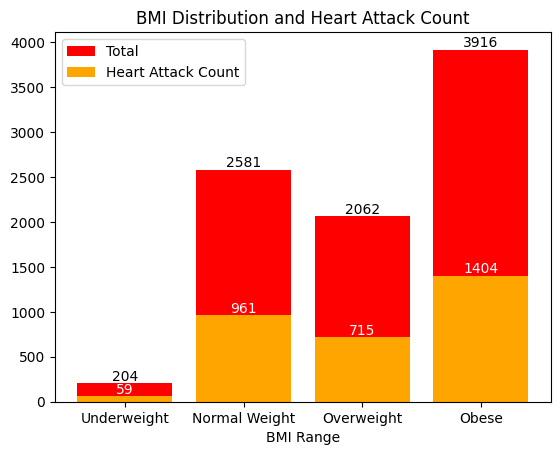

In [ ]:
data['BMI_Range'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

underweight_data = data[data['BMI_Range'] == 'Underweight']
normal_weight_data = data[data['BMI_Range'] == 'Normal Weight']
overweight_data = data[data['BMI_Range'] == 'Overweight']
obese_data = data[data['BMI_Range'] == 'Obese']

underweight_heart_attack_rate = target[underweight_data.index].mean()
normal_weight_heart_attack_rate = target[normal_weight_data.index].mean()
overweight_heart_attack_rate = target[overweight_data.index].mean()
obese_heart_attack_rate = target[obese_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Underweight', 'Normal Weight', 'Overweight', 'Obese'],
               [underweight_data.shape[0], normal_weight_data.shape[0], overweight_data.shape[0], obese_data.shape[0]],
               color='red', label='Total')

bars2 = ax.bar(['Underweight', 'Normal Weight', 'Overweight', 'Obese'],
               [underweight_heart_attack_rate * underweight_data.shape[0],
                normal_weight_heart_attack_rate * normal_weight_data.shape[0],
                overweight_heart_attack_rate * overweight_data.shape[0],
                obese_heart_attack_rate * obese_data.shape[0]],
               color='orange', label='Heart Attack Count')

plt.title('BMI Distribution and Heart Attack Count')
plt.xlabel('BMI Range')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

# Continent Feature

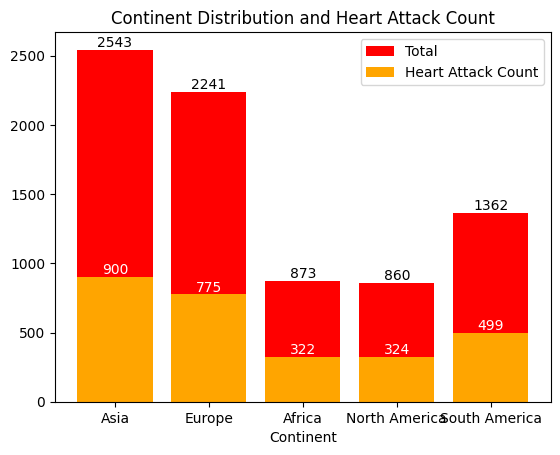

In [ ]:
asia_data = data[data['Continent'] == 'Asia']
europe_data = data[data['Continent'] == 'Europe']
africa_data = data[data['Continent'] == 'Africa']
north_america_data = data[data['Continent'] == 'North America']
south_america_data = data[data['Continent'] == 'South America']

asia_heart_attack_rate = target[asia_data.index].mean()
europe_heart_attack_rate = target[europe_data.index].mean()
africa_heart_attack_rate = target[africa_data.index].mean()
north_america_heart_attack_rate = target[north_america_data.index].mean()
south_america_heart_attack_rate = target[south_america_data.index].mean()

fig, ax = plt.subplots()

bars1 = ax.bar(['Asia', 'Europe', 'Africa', 'North America', 'South America'],
               [asia_data.shape[0], europe_data.shape[0], africa_data.shape[0], north_america_data.shape[0], south_america_data.shape[0]],
               color='red', label='Total')

bars2 = ax.bar(['Asia', 'Europe', 'Africa', 'North America', 'South America'],
               [asia_heart_attack_rate * asia_data.shape[0],
                europe_heart_attack_rate * europe_data.shape[0],
                africa_heart_attack_rate * africa_data.shape[0],
                north_america_heart_attack_rate * north_america_data.shape[0],
                south_america_heart_attack_rate * south_america_data.shape[0]],
               color='orange', label='Heart Attack Count')

plt.title('Continent Distribution and Heart Attack Count')
plt.xlabel('Continent')
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='white')

plt.show()

We chose to keep South America and North America sperated because that is how it was presented in the dataset. Oceania is not present in the dataset.

#PART 2 : advanced baselines

In [ ]:
#new list

non_numerical_features=["Sex","Diet","Continent"]
data_non_numerical = data[non_numerical_features]

# Initialisation liste des précisions

listeprecisions=[]


Creation of the pipelines for both numerical and non numerical features to use correctly these datas with the futures models


Future possible improvement path : try another encoder for non numerical features (OneHotEncoder for example)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Mise à l'échelle des données numériques

scaler = StandardScaler()
data_numerical_scaled = pd.DataFrame()
for colonne in numerical_features:
    data_numerical_scaled[colonne] = scaler.fit_transform(data_numerical[colonne].values.reshape(-1, 1)).flatten()


# Encodage des données non numériques

label_encoder = LabelEncoder()
data_non_numerical_encoded = pd.DataFrame()
for colonne in non_numerical_features:
    data_non_numerical_encoded[colonne] = label_encoder.fit_transform(data_non_numerical[colonne])


# Concaténer les deux DataFrames en une seule dataset

df_scale = pd.concat([data_non_numerical_encoded,  data_numerical_scaled], axis=1)
#print(df_scale)

In [ ]:
# Ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scale, target, test_size=0.2)

We use here a RandomForest model. The RandomForest model is a learning algorithm used for classification and regression. It builds a set of multiple decision trees during training and combines their predictions to improve model robustness and generalization. Each tree is trained on a random sample of the training data and presents a variety of perspectives, helping to reduce over-fitting.

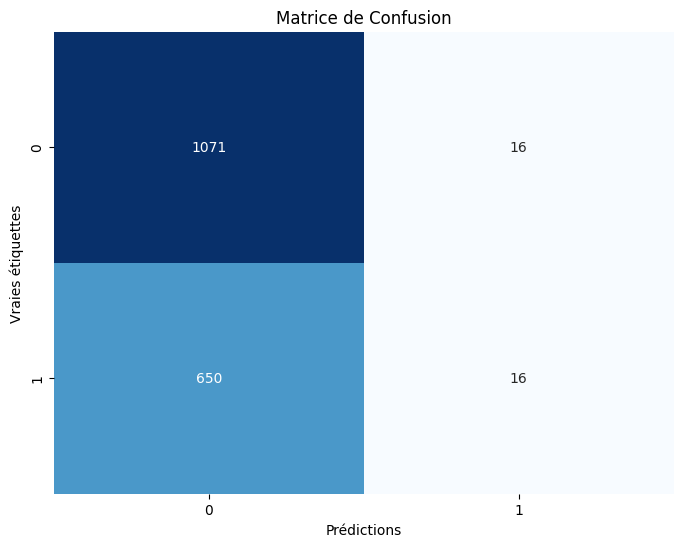

Accuracy: 0.6200798630918426
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1087
           1       0.50      0.02      0.05       666

    accuracy                           0.62      1753
   macro avg       0.56      0.50      0.40      1753
weighted avg       0.58      0.62      0.49      1753



In [ ]:
# Modèle RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Entraînement du modèle
baseline_model = RandomForestClassifier()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

#Précision
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

matrix=confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

print(f'Accuracy: {accuracy}')
print(report)

listeprecisions.append(accuracy)

This model gives an accuracy pretty low for models in general. At the same time, the f1-score is high for the value of the target '0', which means that the model give real informations about people who have no risk of heat attack but this value is low for people who have risk of heart attack. We can also see that the confusion matrix, the predictions are often true to predict 0 but often false to predict 1, which is in accordance with the f1-score.

The logistic regression model is a very common model for classification. It is a statistical model used for binary classification, estimating the probability of an observation belonging to a given category. Here, it is between a risk of a heart attack or zero-risk.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


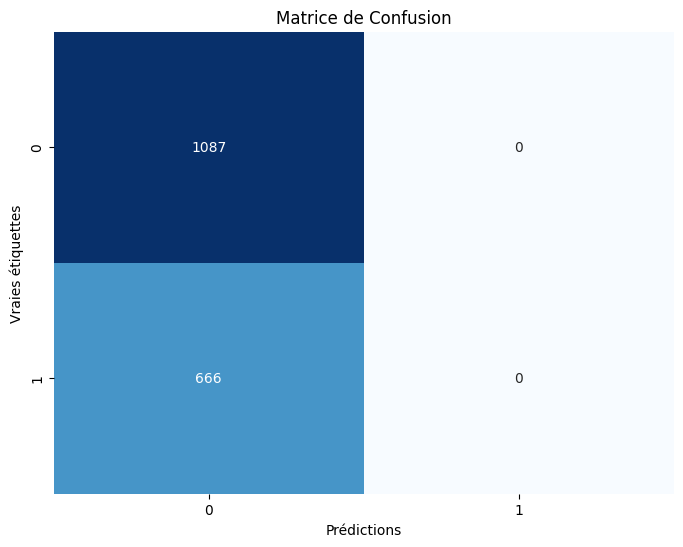

{'C': 0.001, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1087
           1       0.00      0.00      0.00       666

    accuracy                           0.62      1753
   macro avg       0.31      0.50      0.38      1753
weighted avg       0.38      0.62      0.47      1753

0.6200798630918426


In [ ]:
# Modèle LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


logistic_model = LogisticRegression(random_state=42, solver='lbfgs')

# Définition de la grille des hyperparamètres à explorer
param_grid = {
     'solver' : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}


grid_search = GridSearchCV(logistic_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Utilisation du meilleur modèle

best_logistic_model = grid_search.best_estimator_
y_pred = best_logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

matrix=confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

print(grid_search.best_params_)
print(report)
print(accuracy)

listeprecisions.append(accuracy)

This model is worse than the previous because it has a similar accuracy but the precision for people who have a risk of heart attack is 0, which means that it does not recognizes this risk.

The support vector machine (SVM) is a supervised learning model that seeks to find an optimal hyperplane for separating classes in a multidimensional space, offering powerful classification capability for small to medium-sized datasets.

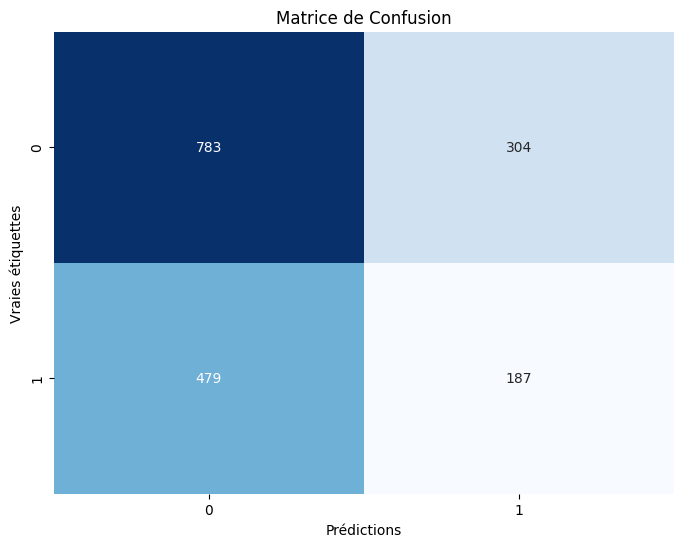

0.5533371363377068
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1087
           1       0.38      0.28      0.32       666

    accuracy                           0.55      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.53      0.55      0.54      1753



In [ ]:
# Modèle SVM

from sklearn.svm import SVC

svm_model = SVC(kernel='sigmoid', C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

matrix=confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

print(accuracy)
print(report)

listeprecisions.append(accuracy)

The results show that the precision is low compared to the other models but it has the best f1-score for both risk and zero-risk, which means that it is the most balanced model.

Here, we use the K-Nearest Neighbors (KNN) model : it is a supervised learning algorithm that ranks data points based on the majority class among their nearest neighbors in feature space.

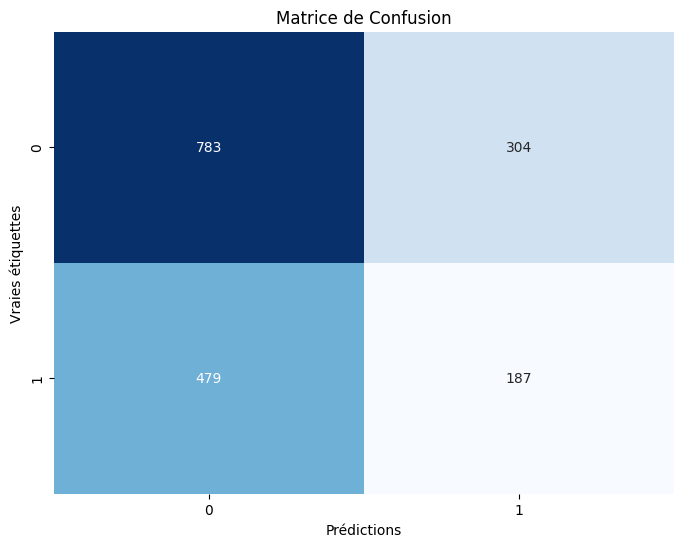

{'n_neighbors': 16}
0.6023958927552767
              precision    recall  f1-score   support

           0       0.62      0.72      0.67      1087
           1       0.38      0.28      0.32       666

    accuracy                           0.55      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.53      0.55      0.54      1753

[0.6200798630918426, 0.6200798630918426, 0.5533371363377068, 0.5533371363377068]


In [ ]:
# Modèle KNN

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Test des paramètres
param_grid = {'n_neighbors': np.arange(1, 21)}  # Vous pouvez ajuster la plage selon vos besoins


knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Évaluation sur l'ensemble de test
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

matrix=confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

print(best_params)
print(test_accuracy)
print(report)

listeprecisions.append(accuracy)
print(listeprecisions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


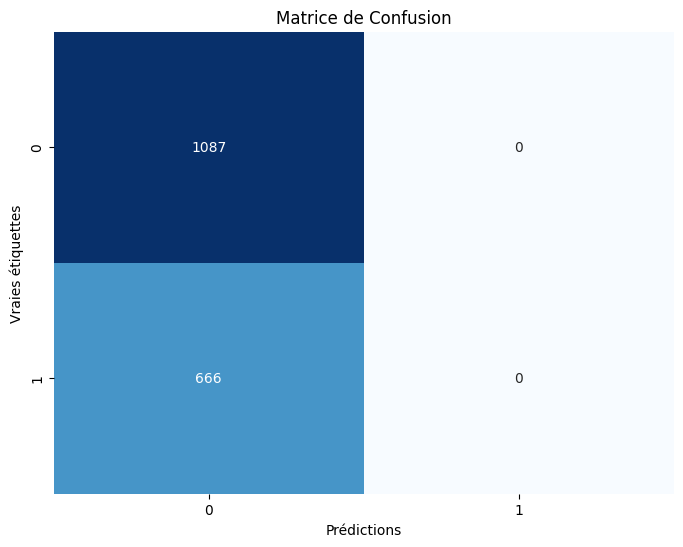

Accuracy: 0.6200798630918426
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1087
           1       0.00      0.00      0.00       666

    accuracy                           0.62      1753
   macro avg       0.31      0.50      0.38      1753
weighted avg       0.38      0.62      0.47      1753



In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc_model = SGDClassifier()
sgdc_model.fit(X_train, y_train)
y_pred = sgdc_model.predict(X_test)

#Précision
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

matrix=confusion_matrix(y_test,y_pred)
classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

print(f'Accuracy: {accuracy}')
print(report)

listeprecisions.append(accuracy)

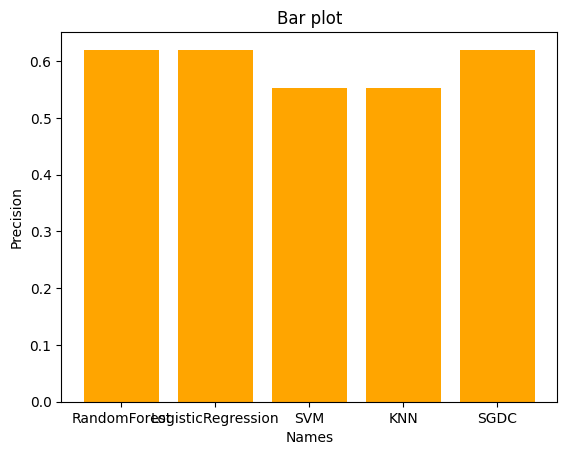

In [ ]:
# Comparaison des modèles

import matplotlib.pyplot as plt

listenomsmodèles=['RandomForest','LogisticRegression','SVM','KNN','SGDC']

plt.bar(listenomsmodèles, listeprecisions, color='orange')

# Ajout de labels et de titre
plt.xlabel('Names')
plt.ylabel('Precision')
plt.title('Bar plot')

# Affichage du diagramme
plt.show()

We can observe that between the four models that we tested, the most accurate is the LogisticRegression model, with 65%. The other ones are approximately equals. It is probably because other techniques should be tested, for example with the scaling of the numerical and non numerical datas. Actually, the scaling that we used is not optimized for each model.

One of the most interesting model to predict some datas is the use of a neural network. Here, we use it with Tensorflow. This fist model is a basic neural network with only input and output layers, with no hidden layer.



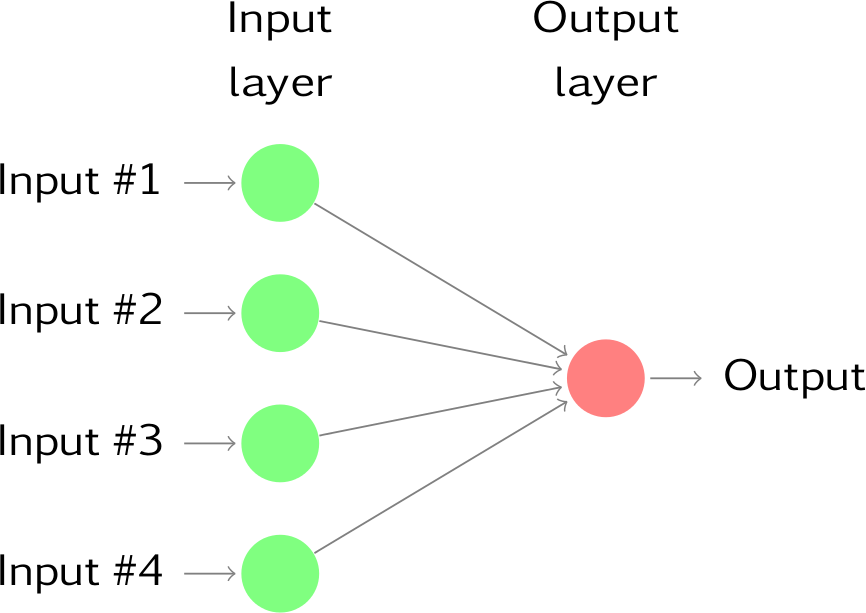

In [ ]:
#Réseau de neuronne basique

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)


Epoch 1/10
220/220 [==============================] - 2s 5ms/step - loss: 0.6680 - accuracy: 0.6301 - val_loss: 0.6805 - val_accuracy: 0.6212
Epoch 2/10
220/220 [==============================] - 1s 4ms/step - loss: 0.6536 - accuracy: 0.6455 - val_loss: 0.6720 - val_accuracy: 0.6184
Epoch 3/10
220/220 [==============================] - 1s 4ms/step - loss: 0.6492 - accuracy: 0.6452 - val_loss: 0.6733 - val_accuracy: 0.6104
Epoch 4/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6461 - accuracy: 0.6469 - val_loss: 0.6750 - val_accuracy: 0.6201
Epoch 5/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.6452 - val_loss: 0.6745 - val_accuracy: 0.6212
Epoch 6/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6400 - accuracy: 0.6484 - val_loss: 0.6755 - val_accuracy: 0.6207
Epoch 7/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6375 - accuracy: 0.6496 - val_loss: 0.6769 - val_accuracy: 0.6184
Epoch 

We observe here that for this first Neural Network, the accuracy is slightly better than for the previous models but we think that it could be improved because we choosed basic hyperparameters and no hidden layer.


This new neural network has hidden layers. We will also choose the optimal hyperparameters by a grid approach : we define 3 parameters to test and for each one we specify the values to test.

In [ ]:
# Réseau de neuronne avec couches cachées

import itertools
from sklearn.metrics import accuracy_score

param_grid = {'optimizer': ['adam', 'sgd'],
              'batch_size': [16, 32, 64],
              'epochs': [10, 20, 30]}


grid_combinations = list(itertools.product(*param_grid.values()))

meilleure_precision = 0.0
meilleur_parametre = {}
listeprecisionsnn=[]

# Itérations

for combination in grid_combinations:

    params = dict(zip(param_grid.keys(), combination))
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilation

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Évaluation
    loss, accuracy = model.evaluate(X_test, y_test)
    listeprecisionsnn.append(accuracy)

    if accuracy>meilleure_precision:
      meilleure_precision=accuracy
      meilleur_parametre = combination

print("Meilleurs paramètres : ", meilleur_parametre)
print("Meilleure précision : ", meilleure_precision)
print(listeprecisionsnn)

Epoch 1/10
220/220 [==============================] - 2s 3ms/step - loss: 0.6633 - accuracy: 0.6414 - val_loss: 0.6681 - val_accuracy: 0.6195
Epoch 2/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6458 - accuracy: 0.6472 - val_loss: 0.6686 - val_accuracy: 0.6207
Epoch 3/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6363 - accuracy: 0.6512 - val_loss: 0.6954 - val_accuracy: 0.6195
Epoch 4/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6301 - accuracy: 0.6508 - val_loss: 0.6730 - val_accuracy: 0.6212
Epoch 5/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6229 - accuracy: 0.6601 - val_loss: 0.6904 - val_accuracy: 0.6172
Epoch 6/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6134 - accuracy: 0.6639 - val_loss: 0.6913 - val_accuracy: 0.6167
Epoch 7/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6055 - accuracy: 0.6720 - val_loss: 0.6895 - val_accuracy: 0.6098
Epoch 

The result is not as good as what we thought because this model has a similar accuracy than the previous neural network model. This is probably due to an overfitting of the datas because here, there are more hidden layers and more neurons.

We will now try to solve this problem of overfitting by including the function "Dropout"

Epoch 1/10
439/439 [==============================] - 2s 3ms/step - loss: 0.6610 - accuracy: 0.6391 - val_loss: 0.6680 - val_accuracy: 0.6201
Epoch 2/10
439/439 [==============================] - 1s 3ms/step - loss: 0.6450 - accuracy: 0.6481 - val_loss: 0.6735 - val_accuracy: 0.6195
Epoch 3/10
439/439 [==============================] - 1s 3ms/step - loss: 0.6373 - accuracy: 0.6488 - val_loss: 0.6836 - val_accuracy: 0.6189
Epoch 4/10
439/439 [==============================] - 1s 3ms/step - loss: 0.6281 - accuracy: 0.6553 - val_loss: 0.6924 - val_accuracy: 0.6132
Epoch 5/10
439/439 [==============================] - 2s 4ms/step - loss: 0.6161 - accuracy: 0.6669 - val_loss: 0.6975 - val_accuracy: 0.5744
Epoch 6/10
439/439 [==============================] - 2s 4ms/step - loss: 0.6047 - accuracy: 0.6816 - val_loss: 0.7051 - val_accuracy: 0.6092
Epoch 7/10
439/439 [==============================] - 1s 3ms/step - loss: 0.5897 - accuracy: 0.6823 - val_loss: 0.7102 - val_accuracy: 0.5904
Epoch 

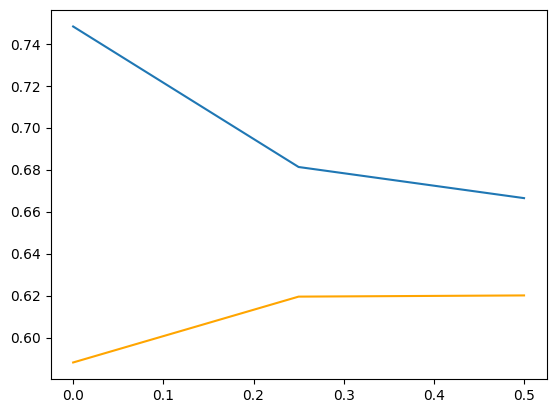

0.6200798749923706


In [ ]:
import itertools
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

def modele(dropout):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(dropout))

  model.add(Dense(64, activation='relu'))
  model.add(Dropout(dropout))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
  loss, accuracy = model.evaluate(X_test, y_test)

  return loss, accuracy

def maxaccuracy(dropmin,dropmax,n):

  meilleureprecision=0
  listedropout= np.linspace(dropmin, dropmax, n)
  listeprecisiondropout=[]
  listelossdropout=[]
  for d in listedropout:
      loss, accuracy= modele(d)
      if accuracy>meilleureprecision:
        meilleureprecision=accuracy
      listelossdropout.append(accuracy)
      listeprecisiondropout.append(loss)

  return listedropout,listeprecisiondropout,listelossdropout,meilleureprecision

listedropout,listeprecisiondropout,listelossdropout,meilleureprecision = maxaccuracy(0,0.5,3)

plt.plot(listedropout,listelossdropout, label='Loss',color='orange')
plt.plot(listedropout,listeprecisiondropout, label='Precision')

plt.show()

print(meilleureprecision)

We can see here that the accuracy is better by more than 2%.